**L067_SVD.ipynb**

2024 JUN 06

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)
iris_df["target"] = iris_dataset.target

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
X = iris_dataset.data
Y = iris_dataset.target

## visualization

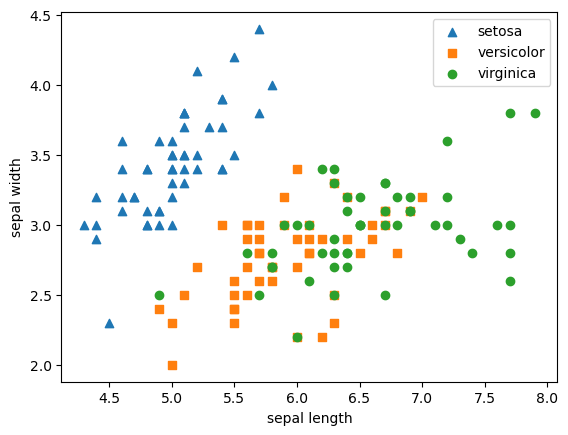

In [6]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df["target"] == i]["sepal_length"]
    y = iris_df[iris_df["target"] == i]["sepal_width"]
    plt.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

**without preprocessing**

# Truncated SVD

In [7]:
from sklearn.decomposition import TruncatedSVD, PCA

In [8]:
svd = TruncatedSVD(n_components=2)

X_svd = svd.fit_transform(X)

In [9]:
print(X_svd.shape)

(150, 2)


## conversion to data frame

In [10]:
svd_columns = ["svd_feature_1", "svd_feature_2"]
iris_df_svd = pd.DataFrame(X_svd, columns=svd_columns)
iris_df_svd["target"] = iris_dataset.target

In [11]:
display(iris_df_svd.head(3))

,svd_feature_1,svd_feature_2,target
0,5.912747,-2.302033,0
1,5.572482,-1.971826,0
2,5.446977,-2.095206,0


## visualization

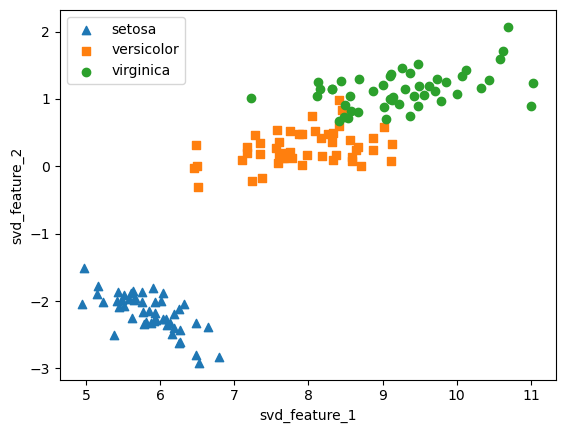

In [12]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df_svd[iris_df_svd["target"] == i]["svd_feature_1"]
    y = iris_df_svd[iris_df_svd["target"] == i]["svd_feature_2"]
    plt.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])

plt.legend()
plt.xlabel("svd_feature_1")
plt.ylabel("svd_feature_2")
plt.show()

**with preprocessing**

# preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

In [15]:
print(type(X_scaled), X_scaled.shape)
print(X_scaled[:3, :])

<class 'numpy.ndarray'> (150, 4)
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]


# Truncated SVD & PCA

In [16]:
from sklearn.decomposition import TruncatedSVD, PCA

**SVD**

In [17]:
svd = TruncatedSVD(n_components=2)

X_svd = svd.fit_transform(X_scaled)

In [18]:
print(X_svd.shape)

(150, 2)


**PCA**

In [19]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

In [20]:
print(X_pca.shape)

(150, 2)


## conversion to data frame

**SVD**

In [21]:
svd_columns = ["svd_feature_1", "svd_feature_2"]
iris_df_svd = pd.DataFrame(X_svd, columns=svd_columns)
iris_df_svd["target"] = iris_dataset.target

In [22]:
display(iris_df_svd.head(3))

,svd_feature_1,svd_feature_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


**PCA**

In [23]:
pca_columns = ["pca_feature_1", "pca_feature_2"]
iris_df_pca = pd.DataFrame(X_pca, columns=pca_columns)
iris_df_pca["target"] = iris_dataset.target

In [24]:
display(iris_df_pca.head(3))

,pca_feature_1,pca_feature_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


## visualization

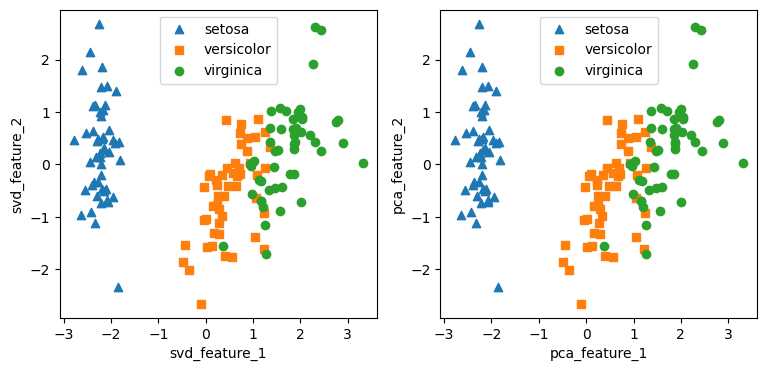

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    # SVD
    x = iris_df_svd[iris_df_svd["target"] == i]["svd_feature_1"]
    y = iris_df_svd[iris_df_svd["target"] == i]["svd_feature_2"]
    ax1.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])
    ax1.set_xlabel("svd_feature_1")
    ax1.set_ylabel("svd_feature_2")
    ax1.legend()
    # PCA
    x = iris_df_pca[iris_df_pca["target"] == i]["pca_feature_1"]
    y = iris_df_pca[iris_df_pca["target"] == i]["pca_feature_2"]
    ax2.scatter(x, y, marker=marker, label=iris_dataset.target_names[i])
    ax2.set_xlabel("pca_feature_1")
    ax2.set_ylabel("pca_feature_2")
    ax2.legend()

plt.show()

# original features vs SVD features

**random forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [27]:
classifier = RandomForestClassifier(random_state=156)

## original features

In [28]:
X, Y = iris_dataset.data, iris_dataset.target

scores = cross_val_score(classifier, X, Y, scoring="accuracy", cv=3)

print(f"cross validation accuracy scores: {scores}")
print(f"mean cross valication accuracy score: {np.mean(scores)}")

cross validation accuracy scores: [0.98 0.94 0.96]
mean cross valication accuracy score: 0.96


## SVD features

In [29]:
X_svd = iris_df_svd[["svd_feature_1", "svd_feature_2"]]

scores = cross_val_score(classifier, X_svd, Y, scoring="accuracy", cv=3)

print(f"cross validation accuracy scores: {scores}")
print(f"mean cross valication accuracy score: {np.mean(scores)}")

cross validation accuracy scores: [0.88 0.88 0.88]
mean cross valication accuracy score: 0.88
